In [4]:
import sys
sys.path.append(r"C:\Users\zachm\OneDrive\Documents\GitHub\zachmiles9")
import scresonators as scres
import scresonators.src.resonator as reso
import scresonators.src.fit_methods.dcm as dcm
import scresonators.src.fit_methods.__init__ as init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
display(dir(scres)) # these are python files, not just methods. It depends on the object (in this case, object is sc)
display(dir(np)) # this might be just methods though

['DCM',
 'Fitter',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'src']

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_builtins',
 '_core',
 '_distributor_init',


In [6]:
display(dir(scres.src)) 

['DCM',
 'Fitter',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'fit_methods',
 'fitter',
 'resonator',
 'utils']

In [7]:
# Load the CSV file into a pandas DataFrame
dataframe = pd.read_csv('test_data/sample_data.csv')

print(dataframe)

# Create a dictionary from the DataFrame
data_dict = {col: dataframe[col].to_numpy() for col in dataframe.columns} ## An attempt at providing the correct format of data when instantiating the Resonator class and/or loading data with 'instance.load_data'

# Print the dictionary to verify
print(data_dict)

# Extract each column into a NumPy array
freqs = dataframe['# Freq'].to_numpy()
amps = dataframe['dB'].to_numpy()
phases_deg = dataframe['Ang'].to_numpy()
phases = np.deg2rad(phases_deg)
unwrapped_phases = np.unwrap(phases)
linear_amps = 10 ** (amps / 20)
xdata, ydata = freqs, np.multiply(linear_amps, np.exp(1j * phases))
real = np.real(ydata)
imag = np.imag(ydata)

# Print the arrays to verify
# print("Frequencies:", freqs)
# print("Magnitudes:", amps)
# print("Phases:", phases)
# print("Complex data:", ydata)
# print("Real data:", real)
# print("Imaginary data:", imag)


          # Freq        dB        Ang
0   4.512381e+09 -3.753585 -59.941933
1   4.512406e+09 -3.763687 -60.241039
2   4.512431e+09 -3.782614 -60.683903
3   4.512456e+09 -3.830069 -61.526066
4   4.512481e+09 -4.027890 -63.842060
5   4.512481e+09 -4.027131 -63.807293
6   4.512482e+09 -4.049395 -64.017303
7   4.512484e+09 -4.077375 -64.283463
8   4.512485e+09 -4.106626 -64.500107
9   4.512486e+09 -4.143174 -64.772530
10  4.512487e+09 -4.185089 -65.053001
11  4.512489e+09 -4.232004 -65.378929
12  4.512490e+09 -4.288643 -65.705078
13  4.512491e+09 -4.357053 -66.084953
14  4.512492e+09 -4.438819 -66.489304
15  4.512494e+09 -4.538288 -66.890541
16  4.512495e+09 -4.656854 -67.354187
17  4.512496e+09 -4.807227 -67.766953
18  4.512497e+09 -4.991262 -68.165352
19  4.512499e+09 -5.220162 -68.433937
20  4.512500e+09 -5.495438 -68.490479
21  4.512501e+09 -5.837986 -68.206406
22  4.512502e+09 -6.239180 -67.191574
23  4.512504e+09 -6.654567 -65.187447
24  4.512505e+09 -7.008639 -61.886349
25  4.512506

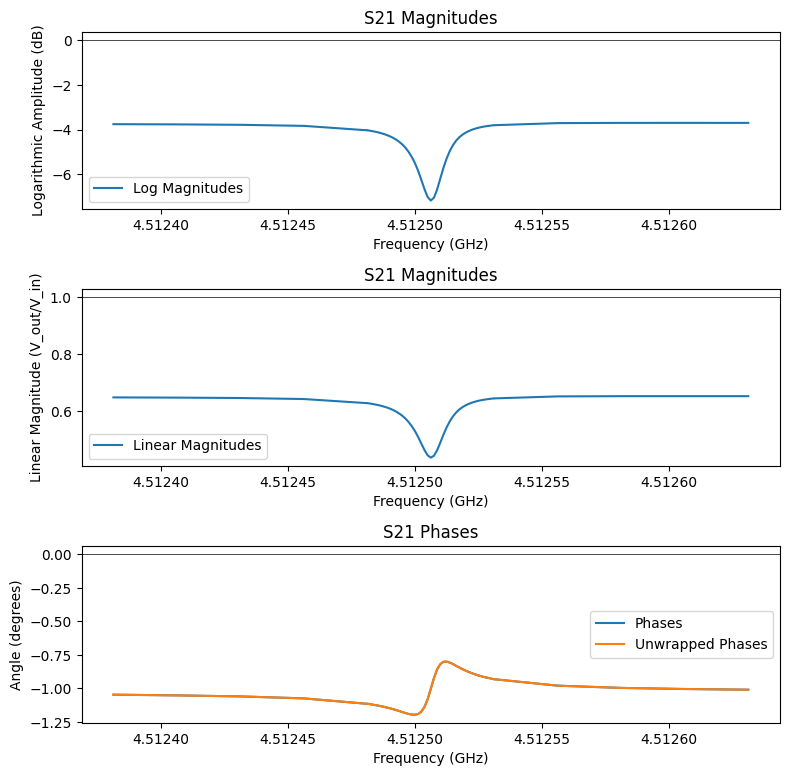

In [8]:
plt.figure(figsize=(8, 10))

# Custom formatter function to ensure each tick label has the actual frequency (not just 0.00050, 0.00055, etc with +4.512 on the lower right side)
def custom_formatter(x, pos):
    return f'{x:.5f}'



plt.subplot(4,1,1)
plt.plot(freqs/1e9, amps, label='Log Magnitudes')

# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

plt.title("S21 Magnitudes")
plt.ylabel("Logarithmic Amplitude (dB)")
plt.xlabel("Frequency (GHz)")
# plt.xlim(0,90)
# plt.ylim(-8,0)
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.legend()
# plt.savefig('1.1.1.png')

plt.subplot(4,1,2)
plt.plot(freqs/1e9, linear_amps, label='Linear Magnitudes')
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
plt.title("S21 Magnitudes")
plt.ylabel("Linear Magnitude (V_out/V_in)")
plt.xlabel("Frequency (GHz)")
plt.axhline(1, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.legend()

plt.subplot(4,1,3)
plt.plot(freqs/1e9, phases, label='Phases')
plt.plot(freqs/1e9, unwrapped_phases, label='Unwrapped Phases')
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
plt.title("S21 Phases")
plt.ylabel("Angle (degrees)")
plt.xlabel("Frequency (GHz)")
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.legend()


plt.tight_layout()
plt.show()

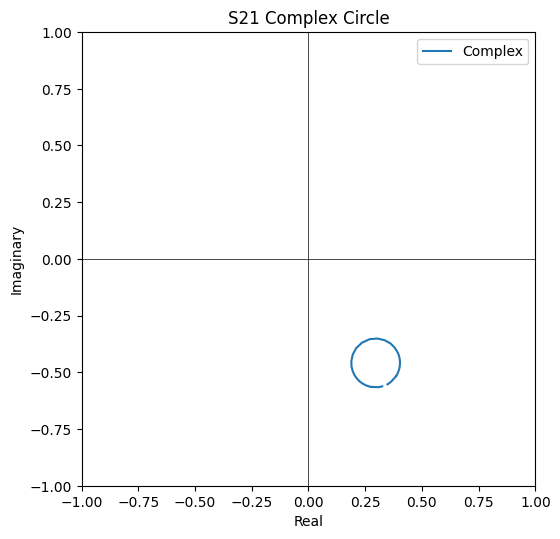

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(4,1,4)
plt.plot(real, imag, label='Complex')
plt.title("S21 Complex Circle")
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
plt.legend()

# Set aspect of the plot to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

In [10]:
res1 = reso.Resonator(data_dict)
res2 = reso.Resonator()
print(res1.__dict__)
print(res2.__dict__)
res2.load_data(dataframe)
print(res2.__dict__)

{'data': {'# Freq': array([4.51238120e+09, 4.51240620e+09, 4.51243120e+09, 4.51245620e+09,
       4.51248120e+09, 4.51248120e+09, 4.51248245e+09, 4.51248370e+09,
       4.51248495e+09, 4.51248620e+09, 4.51248745e+09, 4.51248870e+09,
       4.51248995e+09, 4.51249120e+09, 4.51249245e+09, 4.51249370e+09,
       4.51249495e+09, 4.51249620e+09, 4.51249745e+09, 4.51249870e+09,
       4.51249995e+09, 4.51250120e+09, 4.51250245e+09, 4.51250370e+09,
       4.51250495e+09, 4.51250620e+09, 4.51250745e+09, 4.51250870e+09,
       4.51250995e+09, 4.51251120e+09, 4.51251245e+09, 4.51251370e+09,
       4.51251495e+09, 4.51251620e+09, 4.51251745e+09, 4.51251870e+09,
       4.51251995e+09, 4.51252120e+09, 4.51252245e+09, 4.51252370e+09,
       4.51252495e+09, 4.51252620e+09, 4.51252745e+09, 4.51252870e+09,
       4.51252995e+09, 4.51253120e+09, 4.51253120e+09, 4.51255620e+09,
       4.51258120e+09, 4.51260620e+09, 4.51263120e+09]), 'dB': array([-3.75358462, -3.76368713, -3.78261423, -3.8300693 , -4.027

In [11]:
init

<module 'scresonators.src.fit_methods.__init__' from 'C:\\Users\\zachm\\OneDrive\\Documents\\GitHub\\zachmiles9\\scresonators\\src\\fit_methods\\__init__.py'>

In [12]:
dcm1 = dcm.DCM()
print(dcm1.__dict__)
print(res1.__dict__)
res1.set_fitting_strategy(dcm1)
print(dcm1.__dict__)
print(res1.__dict__)
res1.fit()

{}
{'data': {'# Freq': array([4.51238120e+09, 4.51240620e+09, 4.51243120e+09, 4.51245620e+09,
       4.51248120e+09, 4.51248120e+09, 4.51248245e+09, 4.51248370e+09,
       4.51248495e+09, 4.51248620e+09, 4.51248745e+09, 4.51248870e+09,
       4.51248995e+09, 4.51249120e+09, 4.51249245e+09, 4.51249370e+09,
       4.51249495e+09, 4.51249620e+09, 4.51249745e+09, 4.51249870e+09,
       4.51249995e+09, 4.51250120e+09, 4.51250245e+09, 4.51250370e+09,
       4.51250495e+09, 4.51250620e+09, 4.51250745e+09, 4.51250870e+09,
       4.51250995e+09, 4.51251120e+09, 4.51251245e+09, 4.51251370e+09,
       4.51251495e+09, 4.51251620e+09, 4.51251745e+09, 4.51251870e+09,
       4.51251995e+09, 4.51252120e+09, 4.51252245e+09, 4.51252370e+09,
       4.51252495e+09, 4.51252620e+09, 4.51252745e+09, 4.51252870e+09,
       4.51252995e+09, 4.51253120e+09, 4.51253120e+09, 4.51255620e+09,
       4.51258120e+09, 4.51260620e+09, 4.51263120e+09]), 'dB': array([-3.75358462, -3.76368713, -3.78261423, -3.8300693 , -4.

TypeError: fit() missing 2 required positional arguments: 'amps' and 'phases'